# ADMM iteration statistics plotting

- example generates a set of proxes representing a dummy market eq problem
- one prox per agent; each prox returns a random set of variables, rather than actually computing a prox
- useful for evaluating the computation time of the non-prox parts of the admm algorithm, like computing the residuals or xbar
- the last prox is the sharing prox, simulating the computation to project the goods to sum to the correct value; the sharing prox will generally be much more expensive than the other proxes (which should generally be instantaneous since they are just generating random output data)

In [1]:
%matplotlib inline

import numpy as np
from admm import ADMM

from admm.tests.iter_times import dummy_market_proxes

In [2]:
%%time
n = 1000 # num goods
m = 1000 # num agents
k = 20 # goods per agent

proxes =  dummy_market_proxes(n, m, k)

CPU times: user 128 ms, sys: 9.36 ms, total: 138 ms
Wall time: 139 ms


In [3]:
admm = ADMM(proxes, rho=1.0, threads=None, resid='float')

In [4]:
admm.step(5)

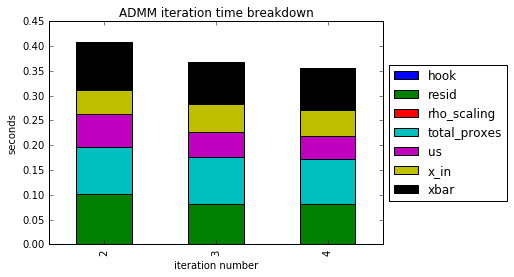

In [5]:
# for the last 3 admm iterations (the default), show the breakdown of computation time involved with each part
# of the ADMM iteration
admm.iter_breakdown()

Total ADMM solve time: 1.81 seconds


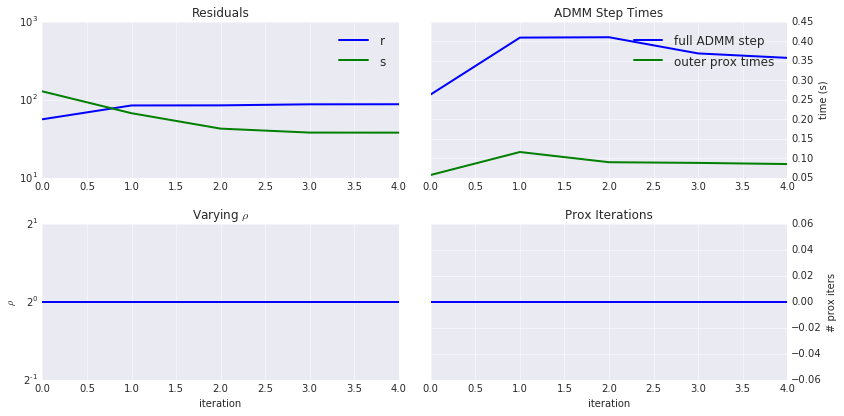

In [6]:
admm.report(verbose=False, hook=False)

Total ADMM solve time: 1.81 seconds


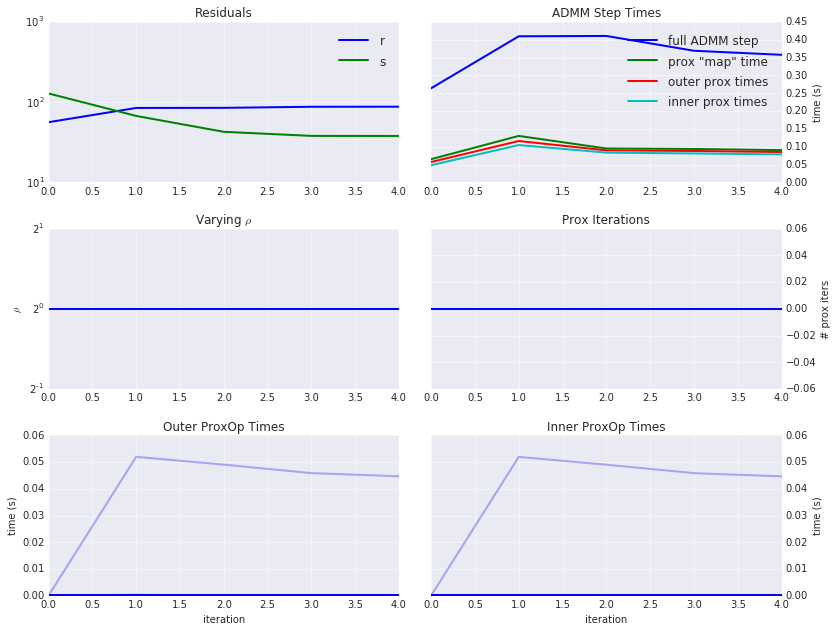

In [7]:
admm.report(verbose=True, hook=False)